In [1]:
import pandas as pd

In [3]:
#Load dataset
data = pd.read_csv('shopping.csv')

In [4]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
data.shape

(3900, 18)

In [6]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [8]:
data.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [9]:
data.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

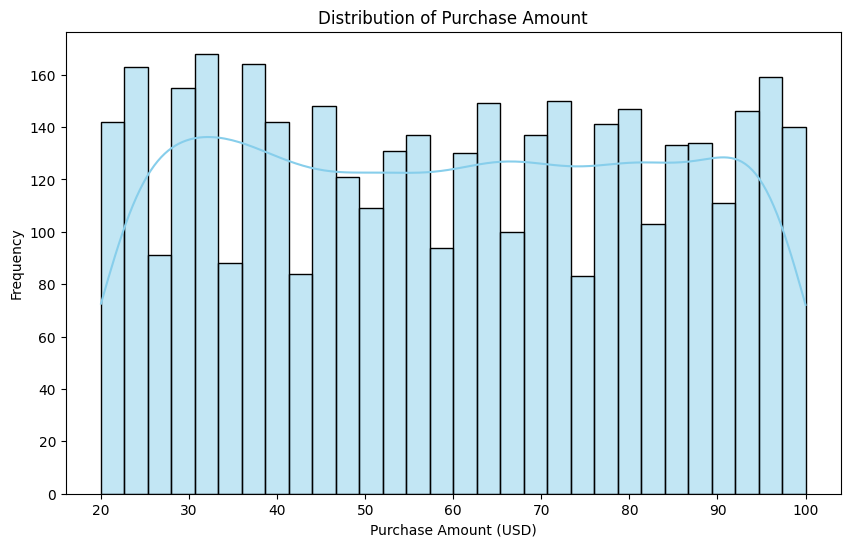

In [14]:
# Distribution of Purchase Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['Purchase Amount (USD)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

C:\Users\uttam\AppData\Local\Temp\ipykernel_4052\3389739735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Frequency of Purchases', data=data, palette='pastel')


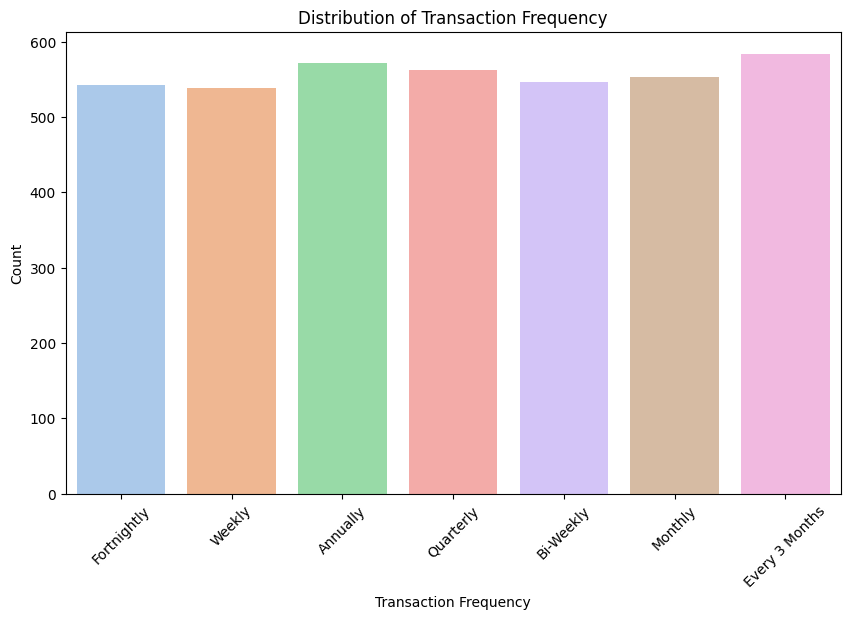

In [15]:
# Distribution of transaction frequency
plt.figure(figsize=(10, 6))
sns.countplot(x='Frequency of Purchases', data=data, palette='pastel')
plt.title('Distribution of Transaction Frequency')
plt.xlabel('Transaction Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

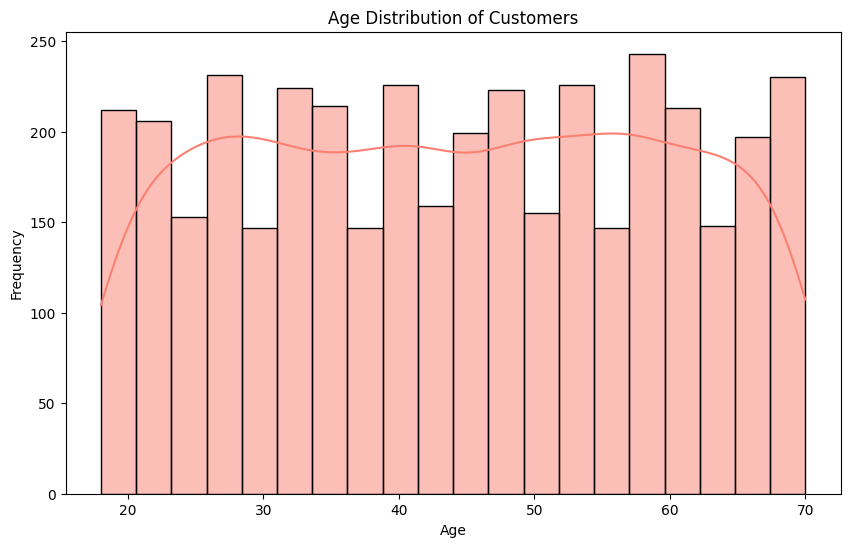

In [16]:
# Customer demographics - Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='salmon')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

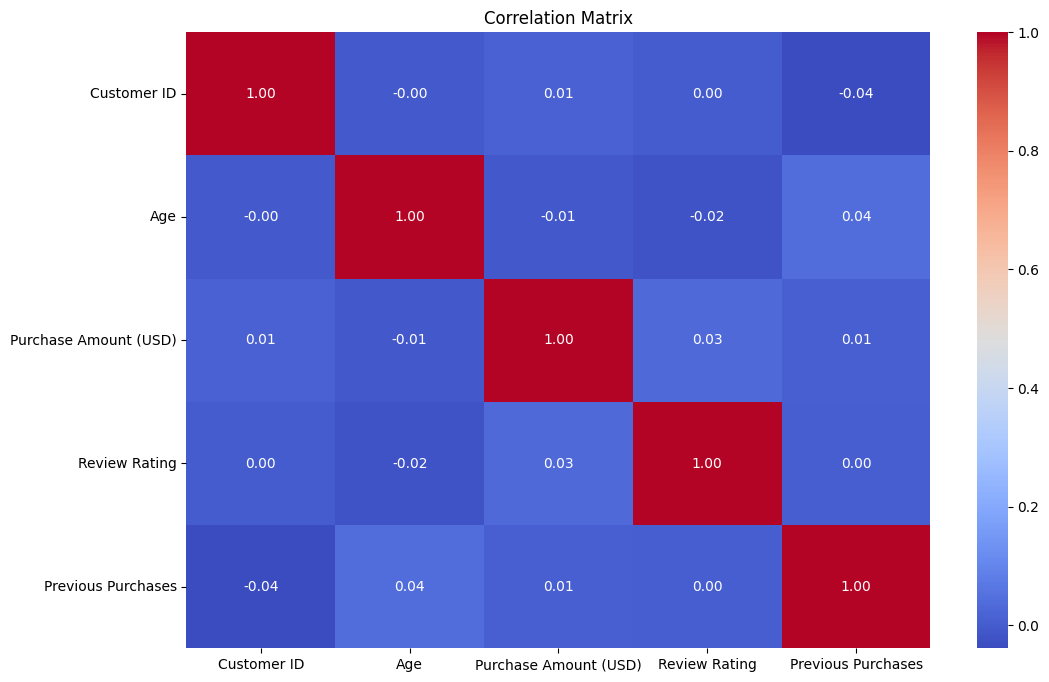

In [19]:
# Explore correlations between different variables (excluding categorical variables)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [20]:
summary_statistics = data.describe()
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
        Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [21]:
product_sales = data.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False)


In [35]:
top_selling_products = product_sales.head(10)
print("Top Selling Products:\n", top_selling_products)



Top Selling Products:
 Item Purchased
Blouse        10410
Shirt         10332
Dress         10320
Pants         10090
Jewelry       10010
Sunglasses     9649
Belt           9635
Scarf          9561
Sweater        9462
Shorts         9433
Name: Purchase Amount (USD), dtype: int64


In [23]:
top_selling_categories = data[data['Item Purchased'].isin(top_selling_products.index)]['Category'].unique()
print("Categories of Top Selling Products:", top_selling_categories)

Categories of Top Selling Products: ['Clothing' 'Accessories']


In [24]:
category_sales = data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

In [25]:
top_selling_categories = category_sales.head(5)
print("Top Selling Categories:\n", top_selling_categories)



Top Selling Categories:
 Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


C:\Users\uttam\AppData\Local\Temp\ipykernel_4052\1635482662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling_categories.index, y=top_selling_categories.values, palette='pastel')


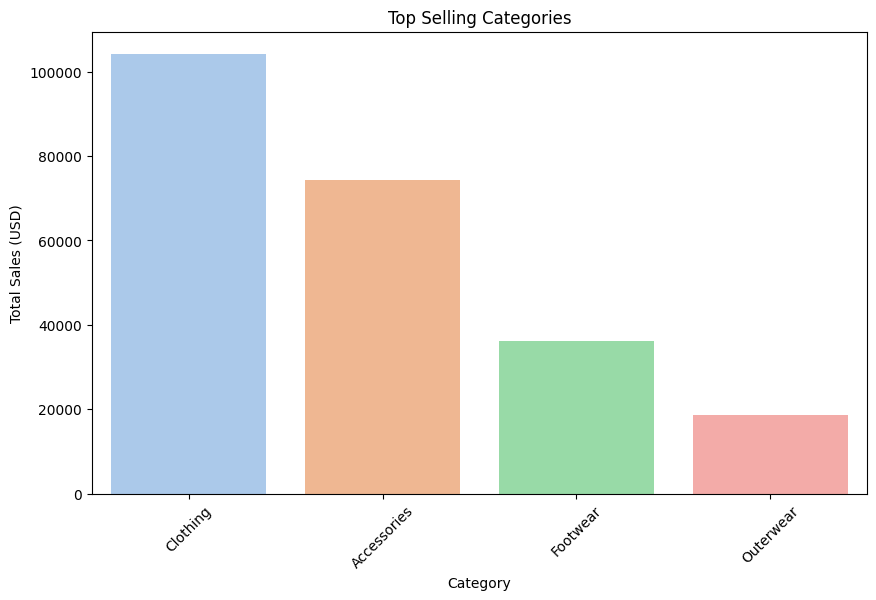

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_categories.index, y=top_selling_categories.values, palette='pastel')
plt.title('Top Selling Categories')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

C:\Users\uttam\AppData\Local\Temp\ipykernel_4052\3421284225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


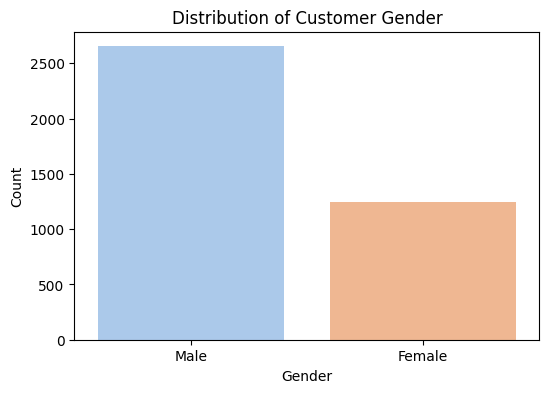

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\uttam\AppData\Local\Temp\ipykernel_4052\1953023192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Method', data=data, palette='pastel')


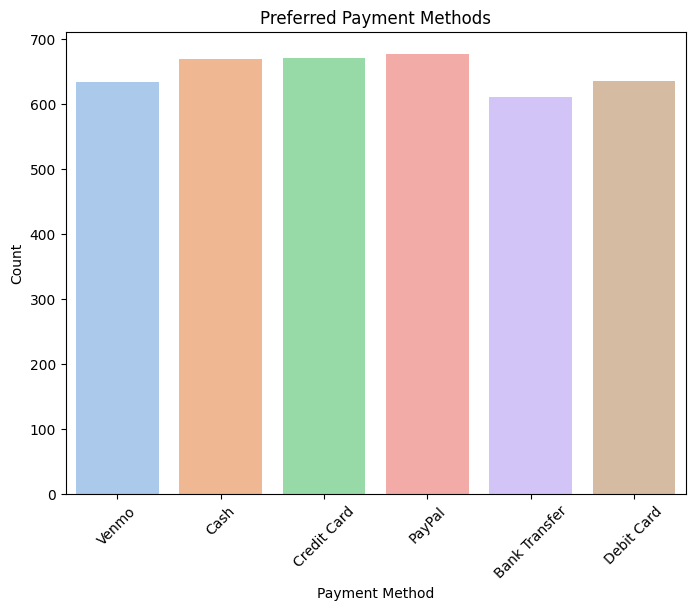

In [30]:
# Preferred payment methods
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment Method', data=data, palette='pastel')
plt.title('Preferred Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [31]:
average_age = data['Age'].mean()
most_common_payment_method = data['Payment Method'].mode()[0]

In [32]:
print("Average Age of Customers:", average_age)
print("Most Common Payment Method:", most_common_payment_method)

Average Age of Customers: 44.06846153846154
Most Common Payment Method: PayPal
